In [1]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#loading data from csv file to a pandas DataFrame
df=pd.read_csv("/content/drive/MyDrive/mail_data.csv")

In [4]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
#replace null values will null string
mail_data=df.where((pd.notnull(df)),'')


#print first 5 rows of dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#check bo of rows and columns
mail_data.shape

(5572, 2)

In [7]:
#spam mail -->0,
#ham mail-->1
mail_data.loc[mail_data["Category"]=="spam","Category",]=0
mail_data.loc[mail_data["Category"]=="ham","Category",]=1

In [8]:
#Separating the data into text and label
X=mail_data["Message"]
Y=mail_data["Category"]

In [9]:
mail_data["Category"].value_counts()

1    4825
0     747
Name: Category, dtype: int64

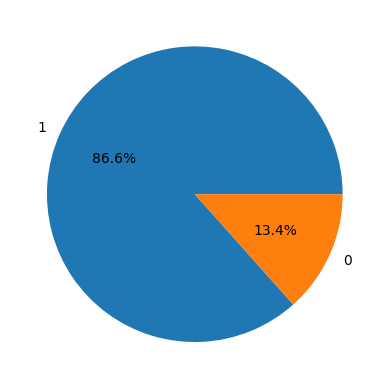

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
value_counts = mail_data["Category"].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.show()

In [11]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [12]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [13]:
#splitting the data into training data and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

print(X.shape)
print(X_train.shape)
print(Y_train.shape)

(5572,)
(4457,)
(4457,)


In [14]:
#Transform the text data to feature vectors
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
#convert Y_train and Y_test as integers
Y_train=Y_train.astype("int")
Y_test=Y_test.astype("int")

In [15]:
print(X_train_features)

  (0, 4334)	0.42941702167641554
  (0, 3958)	0.6161071828926097
  (0, 6586)	0.44333254982109394
  (0, 6927)	0.48935591439341625
  (1, 2121)	0.3573617143022146
  (1, 1428)	0.5869421390016223
  (1, 6971)	0.42812434651556874
  (1, 3168)	0.5869421390016223
  (2, 5115)	0.3408491178137899
  (2, 7353)	0.31988118061968496
  (2, 3852)	0.3408491178137899
  (2, 4884)	0.35749230587184955
  (2, 5695)	0.35749230587184955
  (2, 806)	0.26730249393705324
  (2, 5894)	0.35749230587184955
  (2, 1876)	0.28751725124107325
  (2, 6878)	0.35749230587184955
  (3, 197)	0.36522237107066735
  (3, 3723)	0.16297045459835785
  (3, 2435)	0.26698378141852
  (3, 1825)	0.26858331513730566
  (3, 5231)	0.2266831802864503
  (3, 300)	0.2915969875465198
  (3, 7248)	0.23571908490908416
  (3, 5005)	0.3169028431039865
  :	:
  (4454, 2244)	0.2526916142542512
  (4454, 666)	0.28653660324238944
  (4454, 1575)	0.20946314330145205
  (4454, 1094)	0.24862733340971144
  (4454, 5068)	0.22284357632450164
  (4454, 311)	0.19547195974237946
  

In [16]:
model=LogisticRegression()
#training the logistic regression model with training data
model.fit(X_train_features,Y_train)

LogisticRegression()

In [17]:
#evaluating the trained model
prediction_on_train_data=model.predict(X_train_features)
accuracy_on_train_data=accuracy_score(Y_train,prediction_on_train_data)
accuracy_on_train_data

0.9683643706529056

In [18]:
prediction_on_test_data=model.predict(X_test_features)
lr_accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)
lr_accuracy_on_test_data

0.9524663677130045

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svm_model=SVC()
svm_model.fit(X_train_features,Y_train)

SVC()

In [20]:
svm_prediction_on_train_data=svm_model.predict(X_train_features)
accuracy_on_train_data=accuracy_score(Y_train,svm_prediction_on_train_data)
accuracy_on_train_data

0.9984294368409243

In [21]:
svm_prediction_on_test_data=svm_model.predict(X_test_features)
svm_accuracy_on_test_data=accuracy_score(Y_test,svm_prediction_on_test_data)
svm_accuracy_on_test_data

0.9730941704035875

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_features ,Y_train)

RandomForestClassifier()

In [23]:
rf_prediction_on_train_data=rf.predict(X_train_features)
rf_accuracy_on_train_data=accuracy_score(Y_train,rf_prediction_on_train_data)
rf_accuracy_on_train_data

1.0

In [24]:
rf_prediction_on_test_data=rf.predict(X_test_features)
rf_accuracy_on_test_data=accuracy_score(Y_test,rf_prediction_on_test_data)
rf_accuracy_on_test_data

0.9730941704035875

In [25]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes_model = BernoulliNB()
naive_bayes_model.fit(X_train_features, Y_train)

BernoulliNB()

In [26]:
naive_bayes_prediction_on_train_data=naive_bayes_model.predict(X_train_features)
naive_bayes_accuracy_on_train_data=accuracy_score(Y_train,naive_bayes_prediction_on_train_data)
naive_bayes_accuracy_on_train_data

0.9881085932241418

In [27]:
naive_bayes_prediction_on_test_data=naive_bayes_model.predict(X_test_features)
naive_bayes_accuracy_on_test_data=accuracy_score(Y_test,naive_bayes_prediction_on_test_data)
naive_bayes_accuracy_on_test_data

0.9668161434977578

In [28]:
import xgboost as xgb

xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train_features,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
xgb_prediction_on_train_data=xgb_model.predict(X_train_features)
xgb_accuracy_on_train_data=accuracy_score(Y_train,xgb_prediction_on_train_data)
xgb_accuracy_on_train_data

0.9930446488669509

In [30]:
xgb_prediction_on_test_data=xgb_model.predict(X_test_features)
xgb_accuracy_on_test_data=accuracy_score(Y_test,xgb_prediction_on_test_data)
xgb_accuracy_on_test_data

0.9704035874439462

In [31]:
Accuracy_data=pd.DataFrame({"Models":["LogisticRegression","SVM","RandomForest","Naive Bayes","Gradient Boosting"],
              "Accuracy_Score":[lr_accuracy_on_test_data*100,
                                svm_accuracy_on_test_data*100,
                                rf_accuracy_on_test_data*100,
                               naive_bayes_accuracy_on_test_data*100,
                               xgb_accuracy_on_test_data*100]})
sorted_data = Accuracy_data.sort_values(by='Accuracy_Score', ascending=False)
print(sorted_data)

               Models  Accuracy_Score
1                 SVM       97.309417
2        RandomForest       97.309417
4   Gradient Boosting       97.040359
3         Naive Bayes       96.681614
0  LogisticRegression       95.246637


<Axes: xlabel='Models', ylabel='Accuracy_Score'>

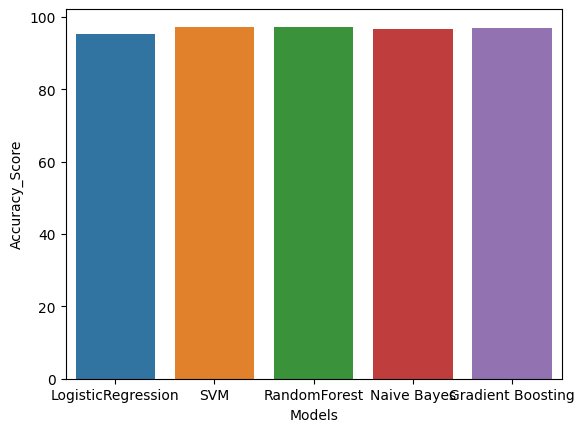

In [32]:
sns.barplot(x=Accuracy_data["Models"],y=Accuracy_data["Accuracy_Score"])

In [33]:
input_mail=["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]
#converting text into numerical values
input_data_features=feature_extraction.transform(input_mail)
#making prediction
prediction=rf.predict(input_data_features)
print(prediction)
if prediction[0]==0:
  print("Spam Mail")
else:
   print("Ham Mail")

[0]
Spam Mail
